In [1]:
# Notebook to explore more serious convolutional networks 
# i.e. includes analysis of training and test accuracies

In [2]:
# Tried a few things:
# More convolution layers did not increase accuracy
# BatchNorm helps the training initialy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from core_functions import SensorSignals

# Model with usual halving of image size and doubling the depth
class CNN_STANDARD(nn.Module):    
    def __init__(self):
        super(CNN_STANDARD, self).__init__()

        self.conv = nn.Sequential(    # Convolutional part, 3 layers
            nn.Conv1d(1, 4, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv1d(4, 8, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv1d(8, 16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
        )
        self.fc = nn.Sequential(        # Fully connected part, 3 layers
            nn.Linear(16 * 4, 256),
            nn.ReLU(),
            nn.Linear(256, 3)
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.shape[0], -1)
        x = self.fc(x)
        return x


class CNN_4(nn.Module):    
    def __init__(self):
        super(CNN_4, self).__init__()

        self.conv = nn.Sequential(    # Convolutional part, 3 layers
            nn.Conv1d(1, 4, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm1d(4),
            nn.ReLU(),
            nn.Conv1d(4, 8, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm1d(8),
            nn.ReLU(),
            nn.Conv1d(8, 16, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm1d(16),
            nn.ReLU(),
        )
        self.fc = nn.Sequential(        # Fully connected part, 3 layers
            nn.Linear(16 * 4, 256),
            nn.ReLU(),
            nn.Linear(256, 3)
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.shape[0], -1)
        x = self.fc(x)
        return x


class CNN_2(nn.Module):    
    def __init__(self):
        super(CNN_2, self).__init__()

        self.conv = nn.Sequential(    # Convolutional part, 3 layers
            nn.Conv1d(1, 8, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm1d(8),
            nn.ReLU(),
            nn.Conv1d(8, 16, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.Conv1d(16, 32, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm1d(32),
            nn.ReLU(),
        )
        self.fc = nn.Sequential(        # Fully connected part, 3 layers
            nn.Linear(32 * 4, 384),
            nn.ReLU(),
            nn.Linear(384, 3)
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.shape[0], -1)
        x = self.fc(x)
        return x


class CNN_5(nn.Module):    
    def __init__(self):
        super(CNN_5, self).__init__()

        self.conv = nn.Sequential(    # Convolutional part, 3 layers
            nn.Conv1d(1, 4, kernel_size=3, stride=2, padding=1),
            nn.Conv1d(4, 4, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm1d(4),
            nn.ReLU(),
            nn.Conv1d(4, 8, kernel_size=3, stride=2, padding=1),
            nn.Conv1d(8, 8, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm1d(8),
            nn.ReLU(),
            nn.Conv1d(8, 16, kernel_size=3, stride=2, padding=1),
            nn.Conv1d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm1d(16),
            nn.ReLU(),
        )
        self.fc = nn.Sequential(        # Fully connected part, 3 layers
            nn.Linear(16 * 4, 256),
            nn.ReLU(),
            nn.Linear(256, 3)
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.shape[0], -1)
        x = self.fc(x)
        return x

In [2]:
dataPath = "./second_collection_triggs_rels_32.npz"
S = SensorSignals(dataPath) 
S.split_data()
S.norm_X()
S.setup_tensors()
S.print_shapes()

# for CNN_STANDARD
# lr=5e-3, wd=1e-4

# with BatchNorm1d
# lr=1e-2, wd=1e-3

models, models_losses, models_acc, models_label = [], [], [], []
# for i, (model, lr, wd) in enumerate(zip([CNN_4(), CNN_STANDARD()], [1e-2, 5e-3], [1e-3, 1e-4])):
for i, model in enumerate([CNN_4(), CNN_2()]):
    lr = 1e-2
    wd = 1e-3

    # Train
    S.train_model(model, learning_rate=lr, batch_size=128, max_epochs=200, weight_decay=wd)

    models.append(model)
    models_losses.append(S.losses)
    models_acc.append(S.accuracies)
    models_label.append(f"model {i}")


Train, Test and Validation set were normalized!
Using Device:  cpu , dtype:  torch.float32
Raw data shape:  (7891, 32)
Labels shape:  (7891,)
Unique labels:  [0 1 2]
Shape of test set: (1184, 32)
Shape of train set: (5700, 32)
Shape of validation set: (1007, 32)
Fraction of single class in test set:  0.2981418918918919
Epoch 1, Batch 1: loss=1.382, train=38.6%, val=40.5%
Epoch 2, Batch 1: loss=0.559, train=76.0%, val=75.9%
Epoch 3, Batch 1: loss=0.419, train=78.4%, val=77.7%
Epoch 4, Batch 1: loss=0.641, train=78.8%, val=81.7%
Epoch 5, Batch 1: loss=0.472, train=83.5%, val=85.3%
Epoch 6, Batch 1: loss=0.397, train=83.0%, val=84.3%
Epoch 7, Batch 1: loss=0.405, train=84.0%, val=84.5%
Epoch 8, Batch 1: loss=0.395, train=84.2%, val=85.8%
Epoch 9, Batch 1: loss=0.463, train=84.9%, val=84.6%
Epoch 10, Batch 1: loss=0.410, train=85.8%, val=86.1%
Epoch 11, Batch 1: loss=0.302, train=85.9%, val=88.1%
Epoch 12, Batch 1: loss=0.432, train=83.6%, val=82.9%
Epoch 13, Batch 1: loss=0.303, train=85

Epoch 147, Batch 1: loss=0.264, train=90.5%, val=88.2%
Epoch 148, Batch 1: loss=0.337, train=89.5%, val=87.2%
Epoch 149, Batch 1: loss=0.269, train=90.1%, val=87.6%
Epoch 150, Batch 1: loss=0.204, train=90.2%, val=88.4%
Epoch 151, Batch 1: loss=0.302, train=87.8%, val=86.2%
Epoch 152, Batch 1: loss=0.209, train=90.7%, val=88.3%
Epoch 153, Batch 1: loss=0.224, train=89.3%, val=88.2%
Epoch 154, Batch 1: loss=0.252, train=90.7%, val=88.4%
Epoch 155, Batch 1: loss=0.216, train=90.0%, val=89.5%
Epoch 156, Batch 1: loss=0.259, train=90.6%, val=89.5%
Epoch 157, Batch 1: loss=0.214, train=90.4%, val=88.0%
Epoch 158, Batch 1: loss=0.250, train=90.1%, val=88.5%
Epoch 159, Batch 1: loss=0.294, train=90.1%, val=89.6%
Epoch 160, Batch 1: loss=0.195, train=90.6%, val=88.2%
Epoch 161, Batch 1: loss=0.361, train=90.5%, val=86.3%
Epoch 162, Batch 1: loss=0.255, train=89.9%, val=89.0%
Epoch 163, Batch 1: loss=0.281, train=90.6%, val=87.9%
Epoch 164, Batch 1: loss=0.261, train=91.4%, val=89.0%
Epoch 165,

Epoch 98, Batch 1: loss=0.196, train=90.6%, val=91.0%
Epoch 99, Batch 1: loss=0.314, train=89.6%, val=90.0%
Epoch 100, Batch 1: loss=0.209, train=90.6%, val=90.3%
Epoch 101, Batch 1: loss=0.308, train=91.1%, val=89.4%
Epoch 102, Batch 1: loss=0.207, train=89.2%, val=89.2%
Epoch 103, Batch 1: loss=0.228, train=90.3%, val=89.1%
Epoch 104, Batch 1: loss=0.272, train=89.2%, val=87.2%
Epoch 105, Batch 1: loss=0.296, train=90.6%, val=88.6%
Epoch 106, Batch 1: loss=0.232, train=91.4%, val=89.4%
Epoch 107, Batch 1: loss=0.223, train=88.4%, val=86.5%
Epoch 108, Batch 1: loss=0.216, train=90.9%, val=89.2%
Epoch 109, Batch 1: loss=0.124, train=90.6%, val=89.2%
Epoch 110, Batch 1: loss=0.317, train=91.9%, val=90.0%
Epoch 111, Batch 1: loss=0.253, train=90.7%, val=89.1%
Epoch 112, Batch 1: loss=0.212, train=91.2%, val=89.7%
Epoch 113, Batch 1: loss=0.233, train=91.4%, val=88.1%
Epoch 114, Batch 1: loss=0.243, train=91.1%, val=89.3%
Epoch 115, Batch 1: loss=0.185, train=91.1%, val=90.0%
Epoch 116, B

Accuracy of test set of best model (idx=1): 88.4%


0.8842905405405406

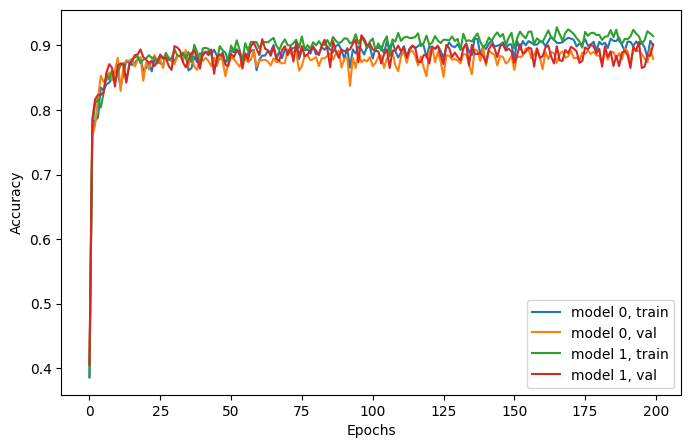

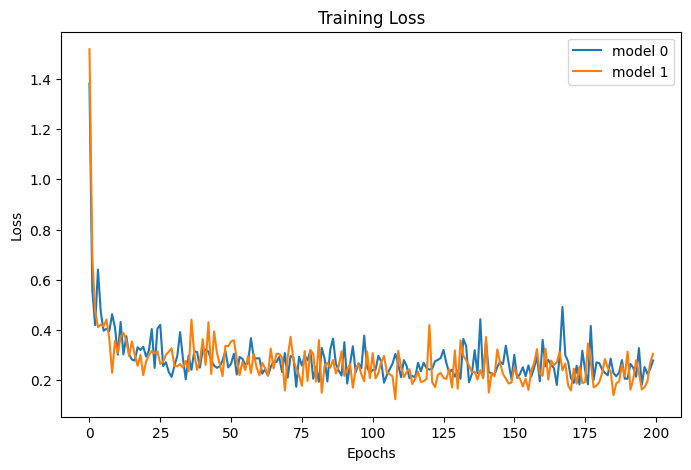

In [3]:
# Plot results from training
def plotAcc(models_label, models_acc):
    """ Plot validation accuracies to determine best model """
    plt.figure(figsize=(8, 5))
    for lab, accs in zip(models_label, models_acc):
        plt.plot(np.arange(accs.shape[0]), accs, label=[lab+", train", lab+", val"])
    plt.legend()
    plt.ylabel("Accuracy")
    plt.xlabel("Epochs")


def plotLosses(models_label, models_losses):
    """ Plot validation accuracies to determine best model """
    plt.figure(figsize=(8, 5))
    plt.title("Training Loss")
    models_losses = np.array(models_losses)
    plt.plot(np.arange(models_losses.shape[1]), models_losses.T, label=models_label)
    plt.legend()
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    
    
def bestModelAcc(models, models_acc, S):
    """
    Prints test accuracy of best model
    Chooses model that yields the best validation accuracy
    S is object containing the data used during training 
    """
    best_acc_idx = np.argmax([acc[-1, -1] for acc in models_acc])
    best_model = models[best_acc_idx]
    best_acc = S.acc_te(best_model)
    print(f"Accuracy of test set of best model (idx={best_acc_idx}): {best_acc*100:.1f}%")
    return best_acc 

# Plot
plotAcc(models_label, models_acc)
plotLosses(models_label, models_losses)
# Print accuracy
bestModelAcc(models, models_acc, S)